In [1]:
# 必要ライブラリのimportとデータの読み込み
import pandas as pd
import numpy as np


yado = pd.read_csv("in/yado.csv", dtype={"yad_no":int}) 
train_log = pd.read_csv("in/train_log.csv", dtype={"session_id":str, "seq_no":int, "yad_no":int})
train_label = pd.read_csv("in/train_label.csv", dtype={"session_id":str, "yad_no":int})
test_log = pd.read_csv("in/test_log.csv", dtype={"session_id":str, "seq_no":int, "yad_no":int})
test_session = pd.read_csv("in/test_session.csv", dtype={"session_id":str})

# 宿の検索回数・予約回数に関する分析

In [2]:
from collections import Counter

train_log_session_cnt = Counter(train_log["session_id"])
train_log_session_cnt

Counter({'734cc105dc165cc485341e367b3c70ab': 10,
         '11fc99d6128427fd688ae8ec67127146': 9,
         '2b85ae2747e0fcf10b79729f992175c3': 9,
         'b53c08ff65393979515bf5197ab445a6': 9,
         'c2ba59a9eca4ff52f466793b7ce9a03a': 9,
         '22152bddc26725414c69ccb984937c8f': 8,
         '2ae801545098db1d6160b9fec16d6b07': 8,
         '2fb8ea49ef463cd1a7996c0b1e9189a2': 8,
         '3297e6f93f16dde0572bd1013ded3b5e': 8,
         '4a98b91936bd330b393f09a6497329d5': 8,
         '4a9ebb431b246dacd40d5b267de4ed05': 8,
         '5e96f688ce0fbe6b4f15344173487abc': 8,
         '8436c27ffad4c00d911ace8b0f274552': 8,
         '8b2ecc3016e3bb5665ab5bfe62147ac2': 8,
         '8da2f7b8f7d1e1f08dca026b41fc673e': 8,
         '92033c596cfa41a68c24b39c7a5c49d4': 8,
         '987f8a42e4074a375765cfd78dd5906b': 8,
         '9a96088893ca29d78be72229099c13c7': 8,
         'a5b275c42cf27ae7a4cec688bb82a597': 8,
         'b41cff74cb0e1e423cf7fc40a8355d3f': 8,
         'baae2441c6435996c7716ee22d8f2

In [3]:
# 各宿に対して、予約された場合にセッションで何回見られていたかを数える
view_cnt = [[] for _ in range(15000)]
for idx, row in train_label.iterrows():
    session_id, yad_no = row[0], row[1]
    view_cnt[yad_no].append(train_log_session_cnt[session_id])

/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/1934035280.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  session_id, yad_no = row[0], row[1]


In [4]:
yado['view_cnt'] = yado['yad_no'].apply(lambda x: sum(view_cnt[x]) / max(1, len(view_cnt[x])))
train_yado = train_log['yad_no'].value_counts().reset_index()
yado_with_count = yado.merge(train_yado, how="left", on='yad_no')
yado_with_count["count"] = yado_with_count["count"].fillna(0)
yado_with_count.rename(columns={'count': 'count_train_log'}, inplace=True)
yado_with_count

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd,view_cnt,count_train_log
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.000000,0.0
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,1.285714,24.0
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,1.521277,180.0
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,1.529412,50.0
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,1.600000,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.000000,0.0
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,1.294118,38.0
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,1.435897,51.0
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739,0.000000,2.0


In [5]:
train_label_yado = train_label['yad_no'].value_counts().reset_index()
yado_with_count = yado_with_count.merge(train_label_yado, how="left", on='yad_no')
yado_with_count["count"] = yado_with_count["count"].fillna(0)
yado_with_count.rename(columns={'count': 'count_train_label'}, inplace=True)
yado_with_count

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd,view_cnt,count_train_log,count_train_label
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.000000,0.0,1.0
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,1.285714,24.0,14.0
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,1.521277,180.0,94.0
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,1.529412,50.0,34.0
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,1.600000,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.000000,0.0,1.0
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,1.294118,38.0,17.0
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,1.435897,51.0,39.0
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739,0.000000,2.0,0.0


In [6]:
test_yado = test_log['yad_no'].value_counts().reset_index()
yado_with_count = yado_with_count.merge(test_yado, how="left", on='yad_no')
yado_with_count["count"] = yado_with_count["count"].fillna(0)
yado_with_count.rename(columns={'count': 'count_test_log'}, inplace=True)
yado_with_count

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd,view_cnt,count_train_log,count_train_label,count_test_log
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.000000,0.0,1.0,30.0
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,1.285714,24.0,14.0,5.0
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,1.521277,180.0,94.0,30.0
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,1.529412,50.0,34.0,17.0
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,1.600000,30.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.000000,0.0,1.0,0.0
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,1.294118,38.0,17.0,1.0
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,1.435897,51.0,39.0,39.0
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739,0.000000,2.0,0.0,2.0


In [7]:
yado_with_count = yado_with_count[['yad_no', 'view_cnt', 'count_train_log', 'count_train_label', 'count_test_log', 'total_room_cnt', 'wid_cd', 'ken_cd', 'lrg_cd', 'sml_cd']]
yado_with_count

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd
0,1,1.000000,0.0,1.0,30.0,129.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c
1,2,1.285714,24.0,14.0,5.0,23.0,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced
2,3,1.521277,180.0,94.0,30.0,167.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c
3,4,1.529412,50.0,34.0,17.0,144.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9
4,5,1.600000,30.0,20.0,0.0,41.0,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910
...,...,...,...,...,...,...,...,...,...,...
13801,13802,1.000000,0.0,1.0,0.0,10.0,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e
13802,13803,1.294118,38.0,17.0,1.0,NaN,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06
13803,13804,1.435897,51.0,39.0,39.0,80.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf
13804,13805,0.000000,2.0,0.0,2.0,8.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739


### rate の追加

In [8]:
yado_with_count['rate1'] = (yado_with_count['count_train_label'] + 10) / (yado_with_count['count_train_log'] + 10)
yado_with_count['rate2'] = (yado_with_count['count_test_log'] + 10) / (yado_with_count['count_train_log'] + 10)

/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/3038414644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yado_with_count['rate1'] = (yado_with_count['count_train_label'] + 10) / (yado_with_count['count_train_log'] + 10)
/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/3038414644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yado_with_count['rate2'] = (yado_with_count['count_test_log'] + 10) / (yado_with_count['count_train_log'] + 10)


### last_viewed countの追加

In [9]:
from collections import defaultdict

# 縦持ちのセッションログを、session_id : [閲覧したyad_noのリスト] のdictに変換
def Make_session_list(session_log):
  map_session_yads = defaultdict(list)
  for _, row in session_log.iterrows():
    session_id = row[0]
    yad_no = row[2]
    map_session_yads[session_id].append(yad_no)
  return map_session_yads

map_session_yads_train = Make_session_list(train_log)
map_session_yads_test = Make_session_list(test_log)

train_last_count = [0 for _ in range(15000)]

for _, viewed_yad_no in map_session_yads_train.items():
  last_viewed = viewed_yad_no[-1]
  train_last_count[last_viewed] += 1

yado_with_count['train_last_count'] = yado_with_count['yad_no'].apply(lambda x: train_last_count[x])
  

/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/517574095.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  session_id = row[0]
/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/517574095.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yad_no = row[2]
/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/517574095.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [10]:
yado_with_count.to_csv('data/yado_with_count.csv')

# ビジネス・観光の分類

In [11]:
sorted_with_viewed = yado_with_count.sort_values(by='view_cnt', ascending=False)
sorted_with_viewed

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
6108,6109,3.000000,2.0,1.0,2.0,6.0,e9316013ee1b03f4525fe361c46ce9c5,84efa50e52f9b471c95bfc3b21b854ad,4d3080adcf149ded909ff112df7738bd,ec9bf1533cd1684e4374ef32f4c73904,0.916667,1.000000,1
2611,2612,3.000000,15.0,5.0,12.0,48.0,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,f4c5e623d45ff30bf1738155d34bcff1,8dd4e02009e1ca4e4382a80f0fe79709,0.600000,0.880000,7
718,719,2.989967,837.0,299.0,683.0,600.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.364817,0.818182,256
8566,8567,2.835206,843.0,267.0,421.0,641.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.324736,0.505275,303
3337,3338,2.824653,1422.0,576.0,70.0,703.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,1d9f09b9e2bd43cebc9885a46388739a,0.409218,0.055866,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3406,0.000000,1.0,0.0,2.0,12.0,f0112abf369fb03cdc5f5309300913da,ade0e32ad9713b41613b242ba618f776,d2514909e2d2f32a9245f80d40677fb1,be7deb8f4eea9088c31e1c494c774ae4,0.909091,1.090909,1
8194,8195,0.000000,1.0,0.0,2.0,8.0,d86102dd9c232bade9a97dccad40df48,3831f43bb997a3028669c251c2c2f552,3671baf0a3a4211a9f7d536830b1a12b,8009b94f803252ce10ab2d7159b05df6,0.909091,1.090909,1
1068,1069,0.000000,2.0,0.0,2.0,21.0,c312e07b7a5d456d53a5b00910a336e1,a1b872e7729b0fa33e1099288384588a,b335e31aaae2ea7afcf6220fcf7b84be,30e4ee82595c5d3fe2a691efaf23e1e3,0.833333,1.000000,2
8199,8200,0.000000,2.0,0.0,0.0,7.0,f0112abf369fb03cdc5f5309300913da,ce3aaf25e7e38a0c42d373fb148efc86,b94b1624f29aceb6511babed280db4d7,9dff180c5e5089dfb26be591000b90f1,0.833333,0.833333,2


In [12]:
sorted_with_viewed[:50]

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
6108,6109,3.000000,2.0,1.0,2.0,6.0,e9316013ee1b03f4525fe361c46ce9c5,84efa50e52f9b471c95bfc3b21b854ad,4d3080adcf149ded909ff112df7738bd,ec9bf1533cd1684e4374ef32f4c73904,0.916667,1.000000,1
2611,2612,3.000000,15.0,5.0,12.0,48.0,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,f4c5e623d45ff30bf1738155d34bcff1,8dd4e02009e1ca4e4382a80f0fe79709,0.600000,0.880000,7
718,719,2.989967,837.0,299.0,683.0,600.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.364817,0.818182,256
8566,8567,2.835206,843.0,267.0,421.0,641.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.324736,0.505275,303
3337,3338,2.824653,1422.0,576.0,70.0,703.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,1d9f09b9e2bd43cebc9885a46388739a,0.409218,0.055866,490
5115,5116,2.816667,540.0,180.0,164.0,330.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.345455,0.316364,226
2200,2201,2.744939,643.0,247.0,530.0,456.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.393568,0.826953,243
12349,12350,2.716698,1115.0,533.0,491.0,696.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,1d9f09b9e2bd43cebc9885a46388739a,0.482667,0.445333,403
13104,13105,2.714286,62.0,21.0,52.0,127.0,dc414a17890cfc17d011d5038b88ca93,223938a74a609968141867c244086206,63083678169dddaf76ddb92c6c6fdf65,33bfe292401fc7f99b8b9831a71f61ee,0.430556,0.861111,31
12016,12017,2.711538,494.0,156.0,409.0,598.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,ed62e66a5031c23c78bd03ccf9f3ef70,d3d1cf557f10fadb1fbc0b429bf14578,0.329365,0.831349,181


In [13]:
sorted_with_viewed[sorted_with_viewed["view_cnt"] == 0.0].sort_values(by="count_test_log", ascending=False)

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
6033,6034,0.0,4.0,0.0,98.0,362.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,d153c8fd78bfad6faadf8e769e5cb314,93bb8a3bdcfb298251b12efa3067d44f,0.714286,7.714286,4
2832,2833,0.0,2.0,0.0,69.0,181.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,0.833333,6.583333,2
6861,6862,0.0,1.0,0.0,51.0,200.0,f0112abf369fb03cdc5f5309300913da,bd054cc265d68a400ccb976ac69c6463,dca13b5f308a0ae88ab8875a9ab56919,3267093e6bcad4a46af9d3e46350b22f,0.909091,5.545455,1
8575,8576,0.0,3.0,0.0,45.0,96.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,d153c8fd78bfad6faadf8e769e5cb314,93bb8a3bdcfb298251b12efa3067d44f,0.769231,4.230769,3
12223,12224,0.0,1.0,0.0,45.0,108.0,321b69d5eec98fe6253e26b86058e6a9,a2b54b288d51bb19085ed1d99c428397,2baa7d9e030a62b56947341cfcca691a,decf2c251dec0e855bad7affbb77bcf2,0.909091,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1964,0.0,1.0,0.0,0.0,14.0,e9316013ee1b03f4525fe361c46ce9c5,21a8fca457386861964bea1ffa848fdd,0a2df87481535eb1918553c82d47f493,fa672d3370e4e61cf26281451fc71d17,0.909091,0.909091,1
10426,10427,0.0,1.0,0.0,0.0,13.0,3300cf6f774b7c6a5807110f244cbc21,013592a15b9a689232792f11da797ac7,221c8bc5d8b92a33441e4e37fb24ab2b,da401bb4ed8c31c8eb2025a6b0063d30,0.909091,0.909091,1
10432,10433,0.0,2.0,0.0,0.0,35.0,e9316013ee1b03f4525fe361c46ce9c5,66c4d01ad8e30155582cf80b1d655986,7763c74e2efa67a522125d9d3d7dde25,a0549a1384a56d5424439c07d0239850,0.833333,0.833333,2
10436,10437,0.0,3.0,0.0,0.0,NaN,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,1c3e1864d98151b856ba5f9a8c672e1e,3f18a1224dc1a17bb78c3464008e27df,0.769231,0.769231,3


/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/462650928.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yado_view = [d[1] for _, d in yado_with_count.iterrows()]


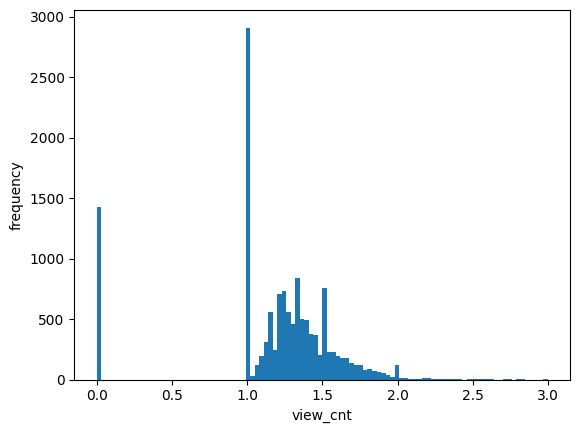

In [14]:
yado_view = [d[1] for _, d in yado_with_count.iterrows()]

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(yado_view, bins=100)
plt.xlabel("view_cnt")
plt.ylabel("frequency")
plt.show()

In [15]:
single_viewed = yado_with_count[yado_with_count["view_cnt"] == 1.0].sort_values(by="count_train_label", ascending=False)
single_viewed


,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
3363,3364,1.0,32.0,44.0,39.0,144.0,b07b75d367ebece55a23ceecc939fff4,0a66f6ab9c0507059da6f22a0e1f1690,9ab5718fd88c6e5f9fec37a51827d428,7aff71bb47acb796d425c5ed5e6dfb3f,1.285714,1.166667,32
12591,12592,1.0,29.0,32.0,11.0,78.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,c9d5e891463e5389c42d16f987ed30bd,9ccc341413e935a914a1ded367b8f80e,1.076923,0.538462,29
12594,12595,1.0,35.0,30.0,46.0,178.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,1a0132cb9c2c6dd3e3b616009d6d6503,0.888889,1.244444,35
7421,7422,1.0,14.0,26.0,0.0,160.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,52d0a7d917cc19ddf5e0ee208f0acfed,5423b90b9624bbb2b47ce18b63fb9a82,1.500000,0.416667,14
1116,1117,1.0,26.0,24.0,4.0,79.0,b07b75d367ebece55a23ceecc939fff4,0a66f6ab9c0507059da6f22a0e1f1690,9ab5718fd88c6e5f9fec37a51827d428,7aff71bb47acb796d425c5ed5e6dfb3f,0.944444,0.388889,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,6688,1.0,1.0,1.0,7.0,23.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,1.000000,1.545455,1
6686,6687,1.0,3.0,1.0,8.0,36.0,dc414a17890cfc17d011d5038b88ca93,6920865be128aa14814810654738b159,727acfd7c7675fcd8f48841c32198780,263ae6be58e0c67310b6513d507f20f3,0.846154,1.384615,3
6679,6680,1.0,0.0,1.0,0.0,9.0,dc414a17890cfc17d011d5038b88ca93,31a0f630d36db568ab23c9c1cd80d1c1,f11d0a982fcea099947ab41cf04aab3f,199073cb3739d73a10d0d96f0b4f8555,1.100000,1.000000,0
6673,6674,1.0,1.0,1.0,1.0,12.0,f0112abf369fb03cdc5f5309300913da,ce3aaf25e7e38a0c42d373fb148efc86,f88c8aaa9860cae5d785a6a82498afa5,4b87fa0613d446ddf14a870793a328e1,1.000000,1.000000,1


In [16]:
hakone_yado = yado_with_count[yado_with_count["sml_cd"] == '1e011cd809001193eb57ad8fcec3b67d']
hakone_yado = hakone_yado.sort_values(by="count_train_label", ascending=False)
hakone_yado[:20]

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
8444,8445,1.929515,395.0,227.0,227.0,112.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.585185,0.585185,182
9103,9104,1.917949,407.0,195.0,235.0,158.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.491607,0.587530,191
3076,3077,1.819588,359.0,194.0,197.0,198.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.552846,0.560976,194
9721,9722,1.844961,219.0,129.0,94.0,95.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.606987,0.454148,128
588,589,1.824561,246.0,114.0,109.0,56.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.484375,0.464844,137
5520,5521,1.647059,105.0,102.0,49.0,122.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.973913,0.513043,58
10063,10064,1.621622,127.0,74.0,124.0,122.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.613139,0.978102,82
924,925,1.250000,59.0,72.0,32.0,76.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,1.188406,0.608696,41
5531,5532,1.567164,85.0,67.0,75.0,90.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,0.810526,0.894737,52
12249,12250,1.360656,59.0,61.0,57.0,39.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,2e35ef11a402c4687ced0fde49e628ea,1e011cd809001193eb57ad8fcec3b67d,1.028986,0.971014,39


In [17]:
niigata_yado = yado_with_count[yado_with_count["ken_cd"] == 'ce83563814cff3080c8ae076f44b3020']
niigata_yado = niigata_yado.sort_values(by="count_train_label", ascending=False)
niigata_yado[:20]

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
3273,3274,1.777778,215.0,117.0,193.0,160.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.564444,0.902222,112
7141,7142,1.948718,173.0,117.0,103.0,139.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.693989,0.617486,88
13645,13646,1.732673,134.0,101.0,82.0,304.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.770833,0.638889,81
7876,7877,1.795699,171.0,93.0,6.0,120.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.569061,0.088398,88
9123,9124,1.617978,132.0,89.0,88.0,233.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.697183,0.690141,83
733,734,1.636364,124.0,88.0,100.0,255.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.731343,0.820896,77
1505,1506,1.586207,94.0,87.0,50.0,NaN,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.932692,0.576923,57
8507,8508,1.536585,106.0,82.0,88.0,NaN,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.793103,0.844828,65
8739,8740,1.580247,163.0,81.0,77.0,170.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.526012,0.502890,94
4856,4857,1.602564,121.0,78.0,31.0,157.0,8a1c0d3243bba111cbcd1ec6c692dc6d,ce83563814cff3080c8ae076f44b3020,7c9ac287ff356750bf04d679c3c8fe9e,1e9d5bd97f324fdf170a1f9171552c6f,0.671756,0.312977,74


In [18]:
yado_with_count[yado_with_count["view_cnt"] != 0.0]

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count
0,1,1.000000,0.0,1.0,30.0,129.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.100000,4.000000,0
1,2,1.285714,24.0,14.0,5.0,23.0,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,0.705882,0.441176,20
2,3,1.521277,180.0,94.0,30.0,167.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,0.547368,0.210526,117
3,4,1.529412,50.0,34.0,17.0,144.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,0.733333,0.450000,33
4,5,1.600000,30.0,20.0,0.0,41.0,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,0.750000,0.250000,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13800,13801,1.584746,142.0,118.0,0.0,300.0,e9316013ee1b03f4525fe361c46ce9c5,517061b8165aa6370d9025951a64aa52,5292f57c6ffd072df5730686ecc62fa9,8a04ba33486c0b326fa0c795922a14d9,0.842105,0.065789,82
13801,13802,1.000000,0.0,1.0,0.0,10.0,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.100000,1.000000,0
13802,13803,1.294118,38.0,17.0,1.0,NaN,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,0.562500,0.229167,32
13803,13804,1.435897,51.0,39.0,39.0,80.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,0.803279,0.803279,35


In [19]:
view_cnt_without0 = yado_with_count[yado_with_count["view_cnt"] != 0.0]["view_cnt"]
Q1 = np.percentile(view_cnt_without0, 25)
Q2 = np.percentile(view_cnt_without0, 50)
Q3 = np.percentile(view_cnt_without0, 75)

print(Q1, Q2, Q3)

1.0833333333333333 1.2857142857142858 1.4583333333333333


In [20]:
def judge_business_leisure(avg_view_cnt):
    if avg_view_cnt == 0.0:
        return 0
    if avg_view_cnt <= Q1:
        return "ビジネス"
    if avg_view_cnt <= Q2:
        return "ビジネスミドル"
    if avg_view_cnt <= Q3:
        return "観光ミドル"
    else:
        return "観光"

In [21]:
yado_with_count["bus_le"] = yado_with_count["view_cnt"].apply(judge_business_leisure)

/var/folders/6k/nrp954t51fq50vv_ch4k2wc00000gn/T/ipykernel_13115/2431243434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yado_with_count["bus_le"] = yado_with_count["view_cnt"].apply(judge_business_leisure)


In [22]:
yado_with_count

,yad_no,view_cnt,count_train_log,count_train_label,count_test_log,total_room_cnt,wid_cd,ken_cd,lrg_cd,sml_cd,rate1,rate2,train_last_count,bus_le
0,1,1.000000,0.0,1.0,30.0,129.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.100000,4.000000,0,ビジネス
1,2,1.285714,24.0,14.0,5.0,23.0,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,0.705882,0.441176,20,ビジネスミドル
2,3,1.521277,180.0,94.0,30.0,167.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,0.547368,0.210526,117,観光
3,4,1.529412,50.0,34.0,17.0,144.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,0.733333,0.450000,33,観光
4,5,1.600000,30.0,20.0,0.0,41.0,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,0.750000,0.250000,18,観光
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,1.000000,0.0,1.0,0.0,10.0,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.100000,1.000000,0,ビジネス
13802,13803,1.294118,38.0,17.0,1.0,NaN,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,0.562500,0.229167,32,観光ミドル
13803,13804,1.435897,51.0,39.0,39.0,80.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,0.803279,0.803279,35,観光ミドル
13804,13805,0.000000,2.0,0.0,2.0,8.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739,0.833333,1.000000,2,0


In [23]:
sum_each_type = {}

for bl in range(-1, 4):
    df = yado_with_count[yado_with_count["bus_le"] == bl]
    count_label = df["count_train_label"]
    sum_each_type[bl] = count_label.sum()

sum_each_type

{-1: 0.0, 0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}

In [24]:
yado_with_count.to_csv('data/yado_with_count.csv')